# Vaccine Adverse Event Reporting System #

## Overview ##

**1. Introduction**

**2. Generating feature set**

**3. Data Preprocessing**

**4. Training and Test Data set**

**6. Confusion Matrix**

**7. Heatmaps**



## Introduction ##

- The Vaccine Adverse Event Reporting System (VAERS) was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccines. 


- No prescription drug or biological product, such as a vaccine, is completely free from side effects. Vaccines protect many people from dangerous illnesses, but vaccines, like drugs, can cause side effects, a small percentage of which may be serious. 


- VAERS researchers apply procedures and methods of data analysis to help us closely monitor the safety of vaccines.


- Data Analysis is the process of systematically applying statistical and/or logical techniques to describe, illustrate, condense and evaluate data. 


- Analytic procedures provide a way of drawing inductive inferences from data and distinguishing the signal (the phenomenon of interest) from the noise (statistical fluctuations) present in the data.


- While data analysis in qualitative research, it includes statistical procedures.Many times, analysis becomes an ongoing iterative process where data is continuously collected and analyzed almost simultaneously.


- Indeed, researchers generally analyze for patterns in observations through the entire data collection phase (Savenye, Robinson, 2004). 


- The form of the analysis is determined by the specific qualitative approach taken (field study, ethnography content analysis, oral history, biography, unobtrusive research) and the form of the data (field notes, documents, audiotape, videotape). 


- An essential component of ensuring data integrity is the accurate and appropriate analysis of research findings. 

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Data Exploration ##


- The below code converts raw data to numerical values and saves the result in a csv file named $features.csv$. 


- First we start by reading data from the 3 files:

    - VAERS data
    - VAERS Symptoms
    - VAERS Vaccination
    
    

In [2]:
# pd.show_versions()

In [2]:
def read_vaers_data(filename):
    return pd.read_csv(filename, index_col='VAERS_ID', encoding='iso-8859-1', low_memory=False, memory_map=True)

data = read_vaers_data('2021VAERSDATA.csv')
symptoms = read_vaers_data('2021VAERSSYMPTOMS.csv')
vax = read_vaers_data('2021VAERSVAX.csv')

In [3]:
# data.info()
data.describe()

AGE_YRS      CAGE_YR    CAGE_MO    HOSPDAYS      NUMDAYS  \
count 558105.00000 499906.00000 2654.00000 25656.00000 548249.00000   
mean      49.39801     49.04695    0.20821    13.24400     26.28960   
std       19.01561     19.17781    0.25280   882.92131    628.41152   
min        0.00000      0.00000    0.00000     1.00000      0.00000   
25%       35.00000     34.00000    0.00000     2.00000      0.00000   
50%       50.00000     49.00000    0.10000     3.00000      1.00000   
75%       64.00000     64.00000    0.40000     6.00000      5.00000   
max      119.00000    120.00000    1.00000 99999.00000  44224.00000   

         FORM_VERS  
count 624237.00000  
mean       1.99937  
std        0.02508  
min        1.00000  
25%        2.00000  
50%        2.00000  
75%        2.00000  
max        2.00000

In [4]:
data.head()

RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
VAERS_ID                                                             
916600    01/01/2021    TX 33.00000 33.00000      NaN   F      NaN   
916601    01/01/2021    CA 73.00000 73.00000      NaN   F      NaN   
916602    01/01/2021    WA 23.00000 23.00000      NaN   F      NaN   
916603    01/01/2021    WA 58.00000 58.00000      NaN   F      NaN   
916604    01/01/2021    TX 47.00000 47.00000      NaN   F      NaN   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
916600    Right side of epiglottis swelled up and hinder...  NaN      NaN   
916601    Approximately 30 min post vaccination administ...  NaN      NaN   
916602    About 15 minutes after receiving the vaccine, ...  NaN      NaN   
916603    extreme fatigue, dizziness,. could not lift my...  NaN      NaN   
916604    Injection site swelling, redness, warm to the ...  NaN      NaN   

          ...                                            CUR_ILL  \
VAERS_ID  ...                                                      
916600    ...                                               None   
916601    ...  Patient residing at nursing facility. See pati...   
916602    ...                                               None   
916603    ...                                   kidney infection   
916604    ...                                                 Na   

                                                    HISTORY  \
VAERS_ID                                                      
916600                                                 None   
916601    Patient residing at nursing facility. See pati...   
916602                                                 None   
916603    diverticulitis, mitral valve prolapse, osteoar...   
916604                                                  NaN   

                                                  PRIOR_VAX  SPLTTYPE  \
VAERS_ID                                                                
916600                                                  NaN       NaN   
916601                                                  NaN       NaN   
916602                                                  NaN       NaN   
916603    got measles from measel shot, mums from mumps ...       NaN   
916604                                                  NaN       NaN   

         FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
VAERS_ID                                                            
916600           2  01/01/2021          NaN         Y         NaN   
916601           2  01/01/2021          NaN         Y         NaN   
916602           2  01/01/2021          NaN       NaN           Y   
916603           2  01/01/2021          NaN       NaN         NaN   
916604           2  01/01/2021          NaN       NaN         NaN   

                                                  ALLERGIES  
VAERS_ID                                                     
916600                                    Pcn and bee venom  
916601                                              "Dairy"  
916602                                            Shellfish  
916603    Diclofenac, novacaine, lidocaine, pickles, tom...  
916604                                                   Na  

[5 rows x 34 columns]

In [5]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834197 entries, 916600 to 1787794
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SYMPTOM1         834197 non-null  object 
 1   SYMPTOMVERSION1  834197 non-null  float64
 2   SYMPTOM2         652791 non-null  object 
 3   SYMPTOMVERSION2  652791 non-null  float64
 4   SYMPTOM3         503851 non-null  object 
 5   SYMPTOMVERSION3  503851 non-null  float64
 6   SYMPTOM4         382172 non-null  object 
 7   SYMPTOMVERSION4  382172 non-null  float64
 8   SYMPTOM5         284369 non-null  object 
 9   SYMPTOMVERSION5  284369 non-null  float64
dtypes: float64(5), object(5)
memory usage: 70.0+ MB


In [6]:
vax.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655560 entries, 916600 to 1787794
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   VAX_TYPE         655560 non-null  object
 1   VAX_MANU         655560 non-null  object
 2   VAX_LOT          450286 non-null  object
 3   VAX_DOSE_SERIES  652416 non-null  object
 4   VAX_ROUTE        500908 non-null  object
 5   VAX_SITE         480239 non-null  object
 6   VAX_NAME         655560 non-null  object
dtypes: object(7)
memory usage: 40.0+ MB


In [68]:
VAERS = data.merge(vax, on='VAERS_ID', how='inner')
VAERS.head()

RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
VAERS_ID                                                             
916600    01/01/2021    TX 33.00000 33.00000      NaN   F      NaN   
916601    01/01/2021    CA 73.00000 73.00000      NaN   F      NaN   
916602    01/01/2021    WA 23.00000 23.00000      NaN   F      NaN   
916603    01/01/2021    WA 58.00000 58.00000      NaN   F      NaN   
916604    01/01/2021    TX 47.00000 47.00000      NaN   F      NaN   

                                               SYMPTOM_TEXT DIED DATEDIED  \
VAERS_ID                                                                    
916600    Right side of epiglottis swelled up and hinder...  NaN      NaN   
916601    Approximately 30 min post vaccination administ...  NaN      NaN   
916602    About 15 minutes after receiving the vaccine, ...  NaN      NaN   
916603    extreme fatigue, dizziness,. could not lift my...  NaN      NaN   
916604    Injection site swelling, redness, warm to the ...  NaN      NaN   

          ... OFC_VISIT ER_ED_VISIT  \
VAERS_ID  ...                         
916600    ...         Y         NaN   
916601    ...         Y         NaN   
916602    ...       NaN           Y   
916603    ...       NaN         NaN   
916604    ...       NaN         NaN   

                                                  ALLERGIES  VAX_TYPE  \
VAERS_ID                                                                
916600                                    Pcn and bee venom   COVID19   
916601                                              "Dairy"   COVID19   
916602                                            Shellfish   COVID19   
916603    Diclofenac, novacaine, lidocaine, pickles, tom...   COVID19   
916604                                                   Na   COVID19   

                 VAX_MANU  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
VAERS_ID                                                                
916600            MODERNA  037K20A               1        IM       LA   
916601            MODERNA  025L20A               1        IM       RA   
916602    PFIZER\BIONTECH   EL1284               1        IM       LA   
916603            MODERNA  unknown             UNK       NaN      NaN   
916604            MODERNA      NaN               1        IM       LA   

                                     VAX_NAME  
VAERS_ID                                       
916600            COVID19 (COVID19 (MODERNA))  
916601            COVID19 (COVID19 (MODERNA))  
916602    COVID19 (COVID19 (PFIZER-BIONTECH))  
916603            COVID19 (COVID19 (MODERNA))  
916604            COVID19 (COVID19 (MODERNA))  

[5 rows x 41 columns]

In [183]:
SYM = vax.merge(symptoms, on='VAERS_ID', how='inner')
SYM.head()

KeyError: 'VAERS_ID'

In [184]:
grouped_symptoms = SYM.sort_values(["VAX_NAME"], ascending=False).groupby(["VAX_NAME"])[["SYMPTOM1", "SYMPTOM2", "SYMPTOM3", "SYMPTOM4", "SYMPTOM5"]].count()
grouped_symptoms.head(20)

SYMPTOM1  SYMPTOM2  \
VAX_NAME                                                                 
ADENOVIRUS TYPES 4 & 7, LIVE, ORAL (NO BRAND NAME)        36        25   
ANTHRAX (BIOTHRAX)                                        97        72   
ANTHRAX (NO BRAND NAME)                                    9         9   
BCG (MYCOBAX)                                              2         0   
CHOLERA (NO BRAND NAME)                                    1         1   
CHOLERA (VAXCHORA)                                        30        23   
COVID19 (COVID19 (JANSSEN))                            79768     64735   
COVID19 (COVID19 (MODERNA))                           391582    307623   
COVID19 (COVID19 (PFIZER-BIONTECH))                   369808    288962   
COVID19 (COVID19 (UNKNOWN))                             1903      1481   
DENGUE TETRAVALENT (DENGVAXIA)                            39        33   
DT ADSORBED (NO BRAND NAME)                               21        15   
DTAP (DAPTACEL)                                          304       236   
DTAP (INFANRIX)                                          281       199   
DTAP (NO BRAND NAME)                                      63        52   
DTAP + HEPB + IPV (PEDIARIX)                             310       214   
DTAP + IPV (KINRIX)                                      272       189   
DTAP + IPV (QUADRACEL)                                   124        91   
DTAP + IPV (UNKNOWN)                                       2         2   
DTAP + IPV + HIB (PENTACEL)                              399       295   

                                                    SYMPTOM3  SYMPTOM4  \
VAX_NAME                                                                 
ADENOVIRUS TYPES 4 & 7, LIVE, ORAL (NO BRAND NAME)        20        12   
ANTHRAX (BIOTHRAX)                                        57        42   
ANTHRAX (NO BRAND NAME)                                    8         8   
BCG (MYCOBAX)                                              0         0   
CHOLERA (NO BRAND NAME)                                    0         0   
CHOLERA (VAXCHORA)                                        19        15   
COVID19 (COVID19 (JANSSEN))                            51226     40297   
COVID19 (COVID19 (MODERNA))                           240200    182094   
COVID19 (COVID19 (PFIZER-BIONTECH))                   221697    168980   
COVID19 (COVID19 (UNKNOWN))                             1147       875   
DENGUE TETRAVALENT (DENGVAXIA)                            32        26   
DT ADSORBED (NO BRAND NAME)                               10         5   
DTAP (DAPTACEL)                                          164       114   
DTAP (INFANRIX)                                          138        87   
DTAP (NO BRAND NAME)                                      39        29   
DTAP + HEPB + IPV (PEDIARIX)                             147       101   
DTAP + IPV (KINRIX)                                      105        65   
DTAP + IPV (QUADRACEL)                                    61        41   
DTAP + IPV (UNKNOWN)                                       2         1   
DTAP + IPV + HIB (PENTACEL)                              181       119   

                                                    SYMPTOM5  
VAX_NAME                                                      
ADENOVIRUS TYPES 4 & 7, LIVE, ORAL (NO BRAND NAME)        10  
ANTHRAX (BIOTHRAX)                                        38  
ANTHRAX (NO BRAND NAME)                                    7  
BCG (MYCOBAX)                                              0  
CHOLERA (NO BRAND NAME)                                    0  
CHOLERA (VAXCHORA)                                         9  
COVID19 (COVID19 (JANSSEN))                            31124  
COVID19 (COVID19 (MODERNA))                           133936  
COVID19 (COVID19 (PFIZER-BIONTECH))                   127904  
COVID19 (COVID19 (UNKNOWN))                              682  
DENGUE TETRAVALENT (DENGVAXIA)        

<AxesSubplot:ylabel='VAX_NAME'>

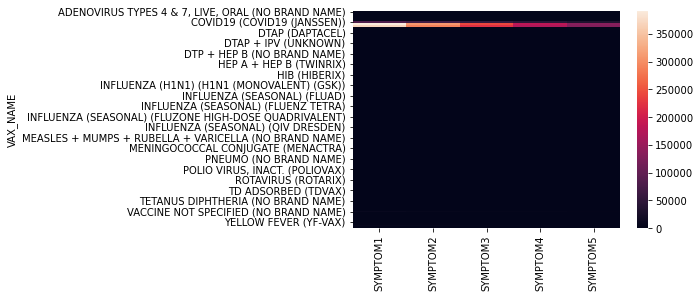

In [185]:
sns.heatmap(grouped_symptoms)